In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### 상승중인 주식에서 reply의 증가는 고점을 예측할 수 있을까?
#상승중인 주가 찾기 60일선 이상인 경우
# 댓글 수 수집하기
# 그래프 그려보기
# 맞춘 횟수와 틀린횟수를 찾아보기

In [47]:
total = pd.read_csv(f'data/{name}_posts.csv',date_parser=True)
total.drop(columns='Unnamed: 0',inplace=True)
total.columns = ['datetime','id']
total['datetime'] = pd.to_datetime(total['datetime'])
total['day']= total['datetime'].dt.day
total['month']= total['datetime'].dt.month
total['year']= total['datetime'].dt.year
total['date']= total['datetime'].dt.time
# total.drop(columns='datetime',inplace=True)
te = total.set_index('datetime')

BM = te.index >= '2021-03-01'
# BM = (te.index > '2021-03-01') & (te.index < '2022-04-01')
a = te[BM]

sol = pd.read_excel(f'data/{name}_price.xlsx', date_parser=True)
sol.set_index('일자',inplace=True)
BM = sol.index >= '2021-03-01'
sol_time = sol[BM]['종가']

c = te.reset_index().groupby(pd.Grouper(key='datetime',freq='1D')).size()

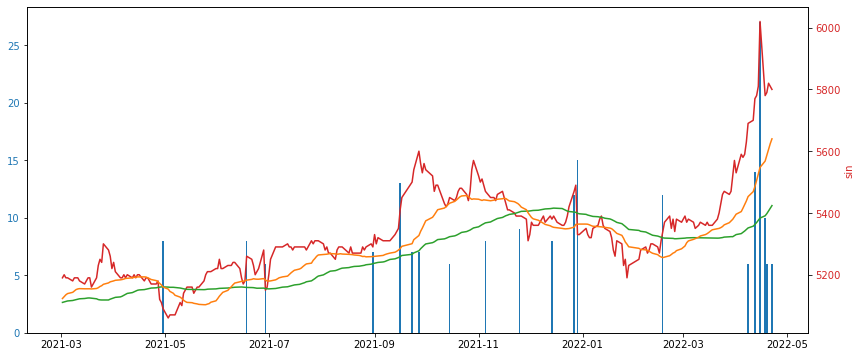

In [75]:
### sol_time있는 게시글만 뽑기
c= c[sol_time.index]
# sol_time=pd.Series([(a-sol_time.min())/(sol_time.max()-sol_time.min()) for a in sol_time], index=sol_time.index)

### 전날 대비 post 증가개수
c_1 = np.concatenate((np.array([0]), c.values[:-1]))

k = c- c_1
k[k < 0] = 0
# k = k[k>5]


### plot
fig, ax1 = plt.subplots(figsize=(14,6))
color = 'tab:blue'
ax1.bar(k.index,height=k,color=color)
ax1.tick_params(axis='y', labelcolor=color)
# ax1.plot([c.index.min(), c.index.max()],[13,13], 'k:')
ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(sol_time, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(sol[BM]['60'], color='tab:green')
ax2.plot(sol[BM]['20'], color='tab:orange')